In [2]:
# Make a histogram of the difference between each timestamp in the gaze data

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from utils import (
    TIMESTAMP_IDENT,
    X_PIXELS,
    Y_PIXELS,
    Events,
)
import json


EYE_TRACKER_FOLDER = "eye_tracker_data/"
GAZE_DATA = []
GAZE_DATA_BOOK = []
GAZE_DATA_PAGE = []

# get all participants from the database
participant_ids = [
    event.participant_id for event in Events.select(Events.participant_id).distinct()
]
# Remove 998 and 999
subquery = Events.select().where(Events.participant_id.in_(participant_ids))

DIFFERENCES_TOTAL = []

# get all the gaze data from the database
for participant in participant_ids:
    # if participant id starts with 9, skip
    if f'{participant}'.startswith("9"):
        continue
    # Get all the open_book events for the participant
    books = subquery.where(
        Events.participant_id == participant, Events.event == "OPEN_BOOK"
    )
    for book in books:
        START_TIME_BOOK = book.time
        participants = json.load(open("participants.json", "r"))
        LOW_RES = participants[f'{participant}']["low_resolution"]

        if not LOW_RES:
            START_TIME_BOOK /= 1000

        formatted_time = datetime.fromtimestamp(START_TIME_BOOK).strftime(
            "%Y-%m-%d_%H-%M-%S"
        )
        GAZE_FILE = f"{EYE_TRACKER_FOLDER}[{participant}]-{formatted_time}.json"
        f = open(GAZE_FILE, "r")
        GAZE_DATA_BOOK = json.load(f)
        f.close()
        df = pd.DataFrame(GAZE_DATA_BOOK['data'])
        timestamps = df[TIMESTAMP_IDENT] / 1000
        differences = np.diff(timestamps)

        DIFFERENCES_TOTAL.extend(differences)


4044
1436553
96478.39100048074
16002022.330036428


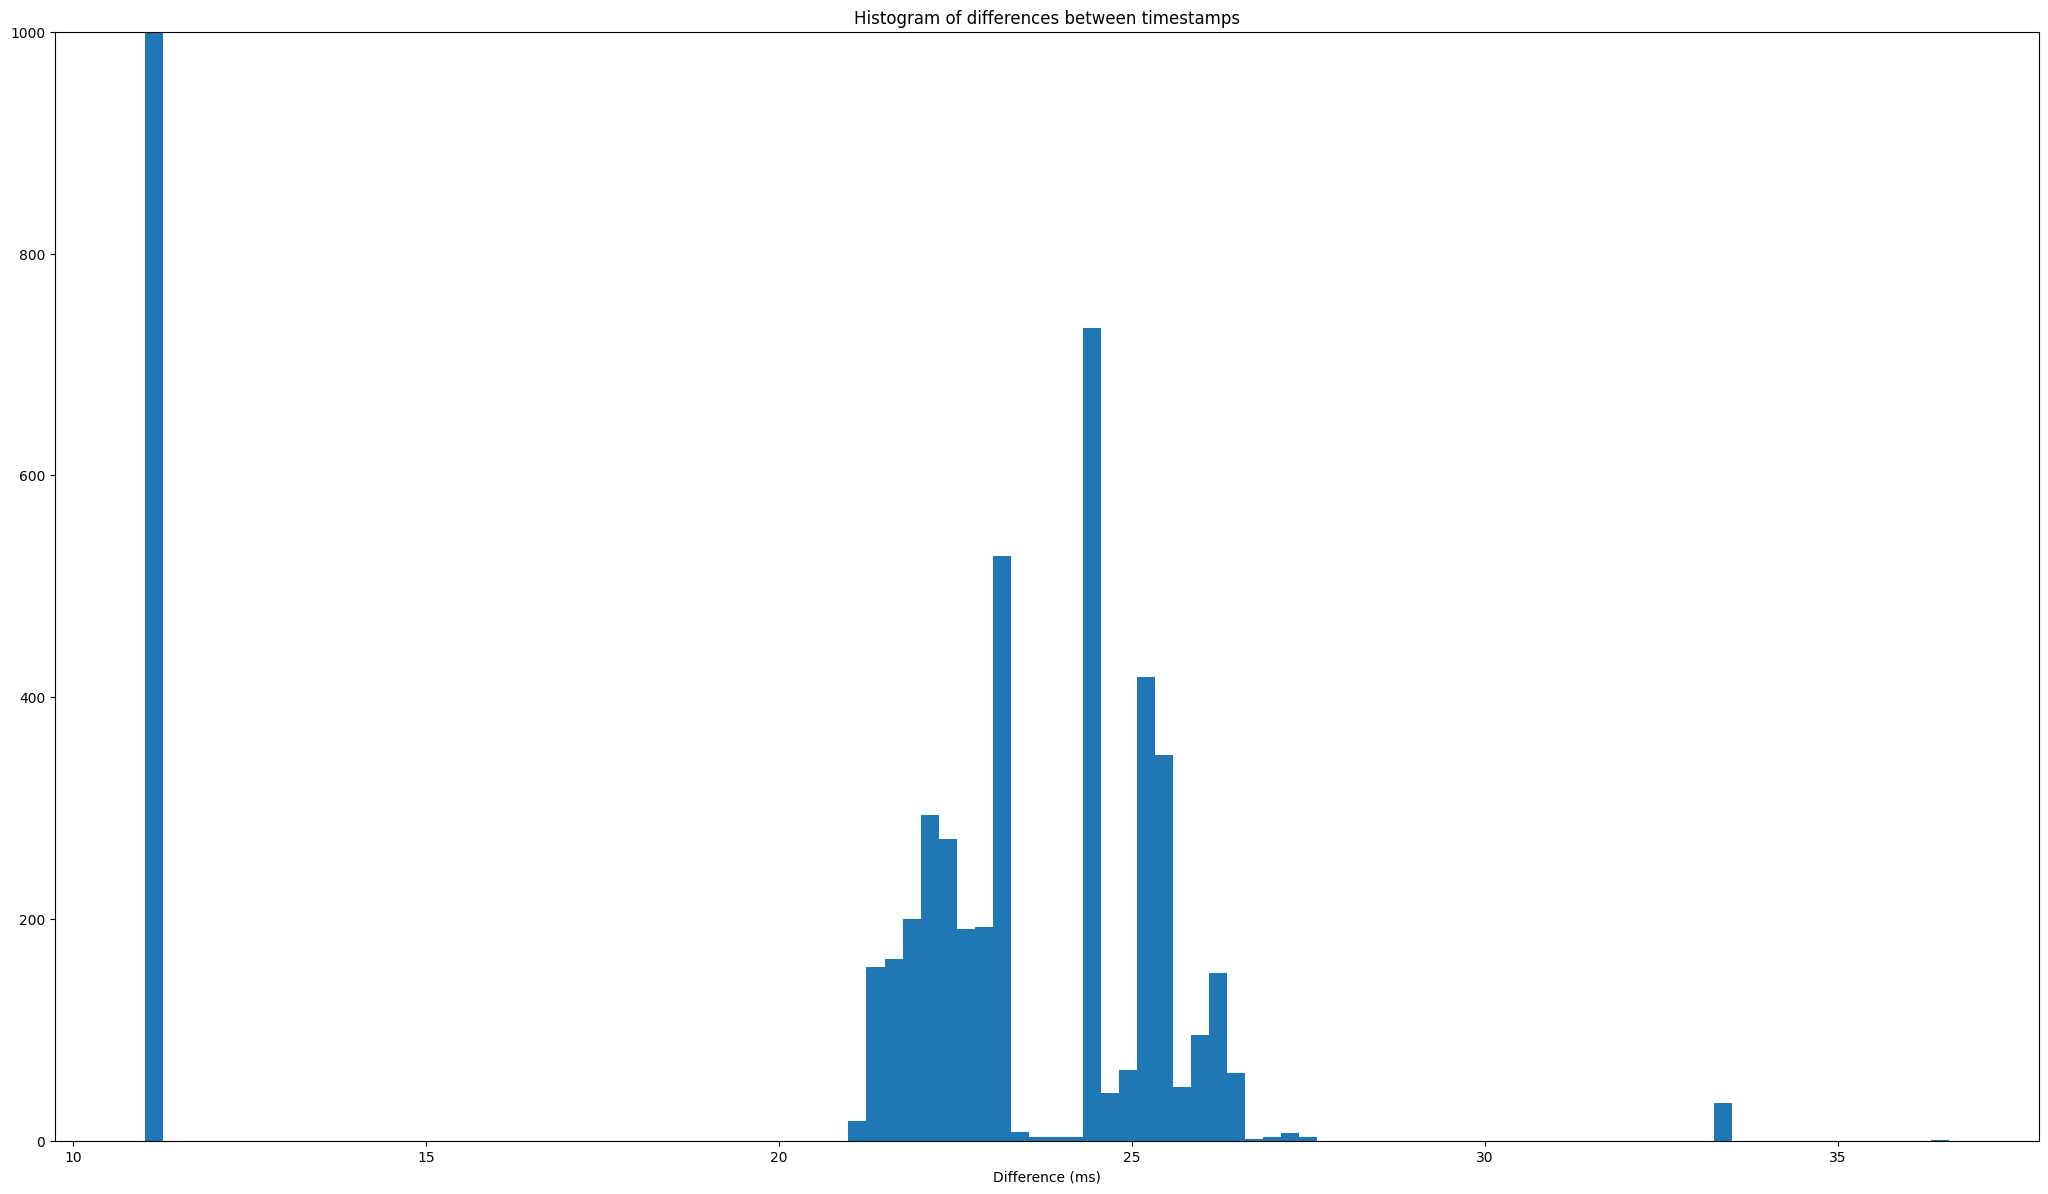

In [16]:
fig, ax = plt.subplots(figsize=(X_PIXELS / 100, Y_PIXELS / 100))

# Add the differences to the histogram
ax.set_title("Histogram of differences between timestamps")
ax.set_xlabel("Difference (ms)")
ax.set_ylim(0, 1000)

#Label each bin
n, bins, patches = ax.hist(DIFFERENCES_TOTAL, bins=100)

# # Add text to each bin, that shows the value that the bin contains
# for i in range(len(bins) - 1):
#     if n[i] > 0 and n[i] < 1000:
#         ax.text(
#             (bins[i] + bins[i + 1]) / 2,
#             n[i],
#             patches[i].xy[0],
#             horizontalalignment="center",
#             verticalalignment="bottom",
#        )


# Filter out the differences that are less than 0.2 seconds
filtered = [x for x in DIFFERENCES_TOTAL if x > 15]
print(len(filtered))
print(len(DIFFERENCES_TOTAL))
print(sum(filtered))
print(sum(DIFFERENCES_TOTAL))